In [12]:
# import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# loading the dataset
df= pd.read_csv("used_cars_data-1.csv")

In [14]:
# display first five rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [15]:
# checking for duplicates
df.duplicated().sum()

0

The dataset has no duplicate

In [16]:
# checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


* The dataset consists of 7253 rows with 14 columns
* Mileage, Engine, and Power are object data types and need to be coverted to numeric data type 

In [17]:
# checking for missing values 
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

* Engine, Power Seats and Price columns have missing values 

## **Data Cleaning**

In [18]:
# creating a function to remove mileage units and convert km/kg to km/l
def remove_mileage_units(mileage):
    
    average_fuel_density_kg_liter = 0.77 
    
    if isinstance (mileage, str):
        
        if mileage.endswith("km/kg"):
            
            return float(mileage[:-6]) / average_fuel_density_kg_liter
        
        elif mileage.endswith("kmpl"):
            
            return float(mileage[:-5])
        
        else:
            return float(mileage)
        
# applying the remove_mileage_units function
df["Mileage"] = df["Mileage"].apply(remove_mileage_units)

In [19]:
# creating a function to remove the power units and return the numeric value as float
def remove_power_units(power):
    if not pd.isnull(power):
        if isinstance(power, str):
            return float(power.split()[0])
        else:
            return float(power)
    else: 
        return np.nan
    
df["Power"] = df["Power"].apply(remove_power_units)
        

In [20]:
# removing the units of the Engine column
df["Engine"]= df["Engine"].str.replace("CC", " ").str.strip()

# converting Engine data type to float 
df["Engine"]= df["Engine"].astype(float, errors= "ignore")

 
# printing updated columns
print(df[["Power", "Engine", "Mileage"]])

       Power  Engine    Mileage
0      58.16   998.0  34.545455
1     126.20  1582.0  19.670000
2      88.70  1199.0  18.200000
3      88.76  1248.0  20.770000
4     140.80  1968.0  15.200000
...      ...     ...        ...
7248  103.60  1598.0  20.540000
7249  103.60  1197.0  17.210000
7250   63.10  1461.0  23.080000
7251  103.60  1197.0  17.200000
7252  170.00  2148.0  10.000000

[7253 rows x 3 columns]


In [21]:
df.dropna(subset= ["Price"], inplace= True)

In [22]:
# sanity checks on missing values 
df.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [23]:
# Handling missing values 

# Calculating means of numerical columns with missing values 
mean_seats = df['Seats'].mean()

mean_power = df["Power"].mean()

mean_mileage = df["Mileage"].mean()

mean_Engine = df["Engine"].mean()



# Replace missing values with the means
df["Seats"].fillna(mean_seats, inplace=True)

df["Power"].fillna(mean_power, inplace=True)

df["Mileage"].fillna(mean_mileage, inplace=True)

df["Engine"].fillna(mean_Engine, inplace=True)



In [24]:
# # Converting the Seat column data type to intger
df['Seats'] = df['Seats'].astype(int, errors='ignore')

In [25]:
# sanity checks on the data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   int32  
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 681.8+ KB


In [26]:
# sanity checks on missing values 
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [27]:
# dropping serial number column
df.drop(["S.No."], inplace = True, axis = 1)

In [28]:
# saving the cleaned dataset
df.to_csv("used_cars_data-1_cleaned2.csv", index= False)

## **Exploring the cleaned dataset** 

In [29]:
# loading the cleaned data

df1= pd.read_csv("used_cars_data-1_cleaned2.csv")

In [30]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,34.545455,998.0,58.16,5,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5,53.14,17.74


In [31]:
# statistical summary of the dataset
df1.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.215246,1621.276450,113.253050,5.276790,21.499855,9.479468
std,3.269742,9.126884e+04,4.783402,599.553865,53.231019,0.806346,24.332922,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.260000,1198.000000,78.000000,5.000000,7.880000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,98.600000,5.000000,11.300000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,21.770000,9.950000
max,2019.000000,6.500000e+06,43.558442,5998.000000,560.000000,10.000000,375.000000,160.000000


* The mean and the media are approximately equal in most of the numerical features . 
* This dispicts a symmetric distribution data  

<Axes: >

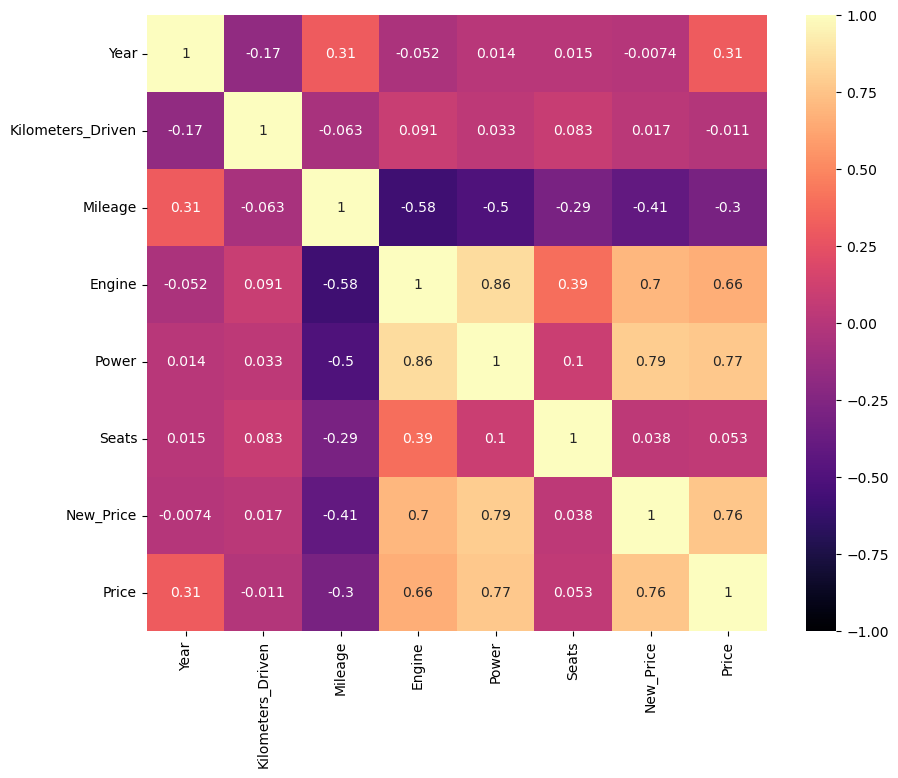

In [32]:
# selecting numerical columns of the data
num_df= df1.select_dtypes(include = "number")

# calculating for the correlation matrix
cor = num_df.corr()

# plotting correlation matrix of the numerical variables
plt.figure(figsize= (10, 8))
sns.heatmap(data= cor, vmin= -1, vmax = 1, cmap= "magma", annot= True)

* There are some form of correlation between the input features and the target(Price)
* Engine(CC), Power(bhp), and New Price  are the input features that are highly correlated with the target(price)
* Correlation among the input features are generally low
* There is howerver high correlation between New Price and Power(bhp)


In [33]:
# selecting the categorical data 
cat_data= df1.select_dtypes(include = "object")
cat_data

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second
...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second
6017,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First


In [35]:
for col in cat_data:
    print(df1[col].value_counts())
    print("==========================")

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64
Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64
Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64


## **Visualizing the Data** 

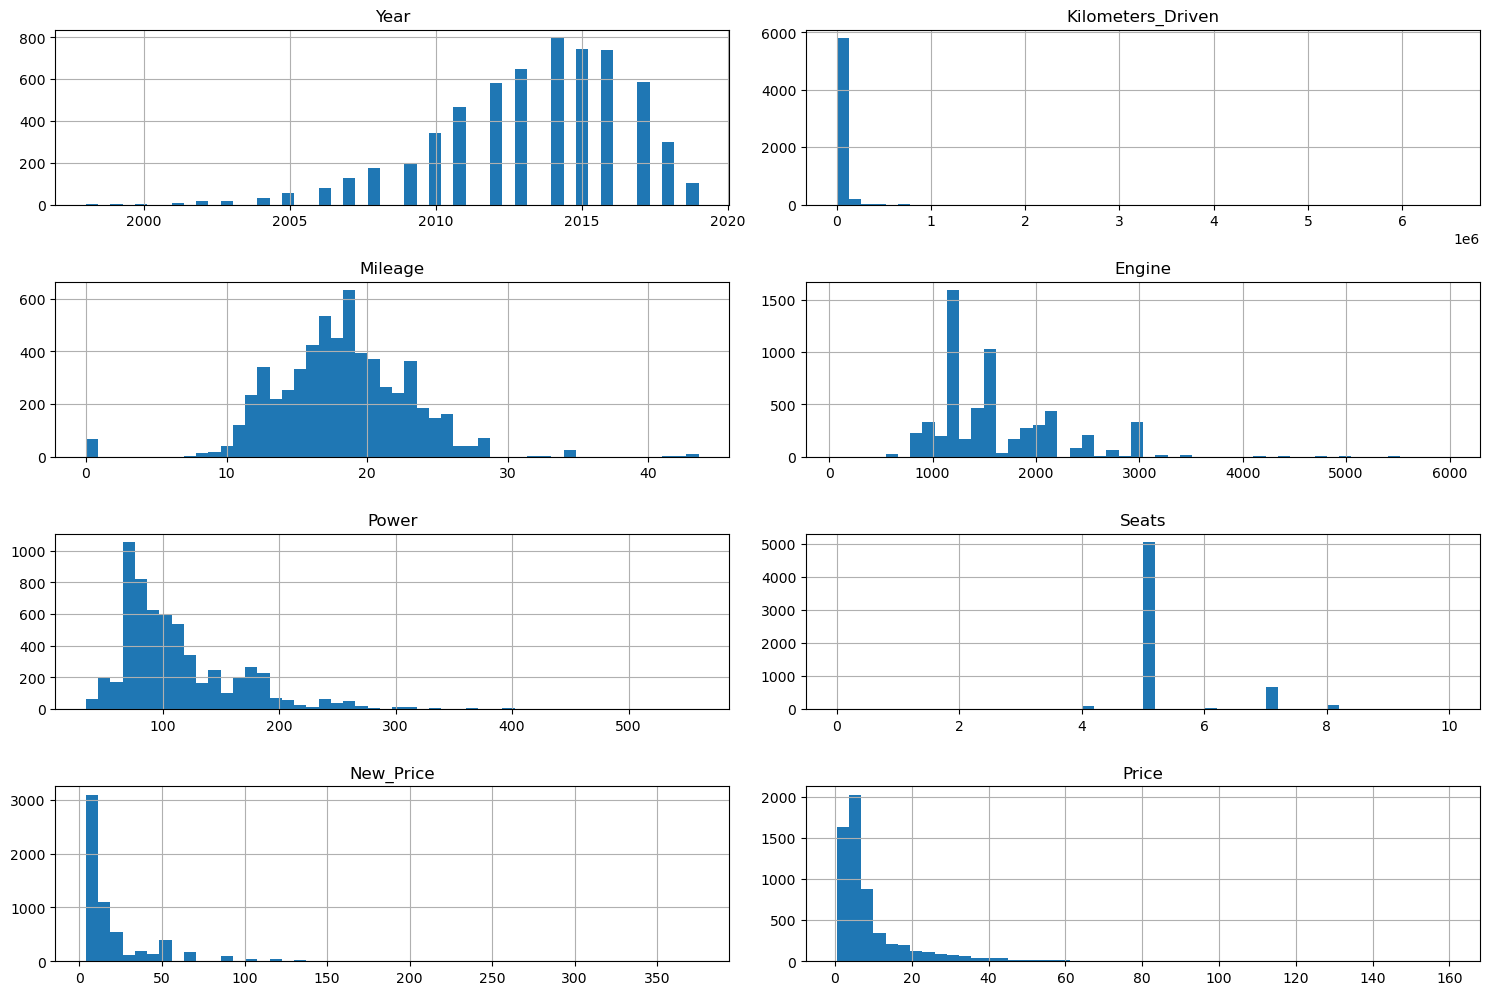

In [43]:
columns_vis = list(num_df)
df1[columns_vis].hist(stacked = False, bins= 50, figsize = (15, 30), layout = (12, 2))
plt.tight_layout();

* Price, New_Price and Kiometers driven are negatively skewed 

* Power, Year, Engine  show normal distribution data

In [44]:
# Logarithmic Transformation of some features  

df1["New_Price"] = np.log(df1["New_Price"] + 1e-4)

df1["Price"] = np.log(df1["New_Price"] + 1e-4)

df1["Kilometers_Driven"] = np.log(df1["Kilometers_Driven"] + 1e-4)


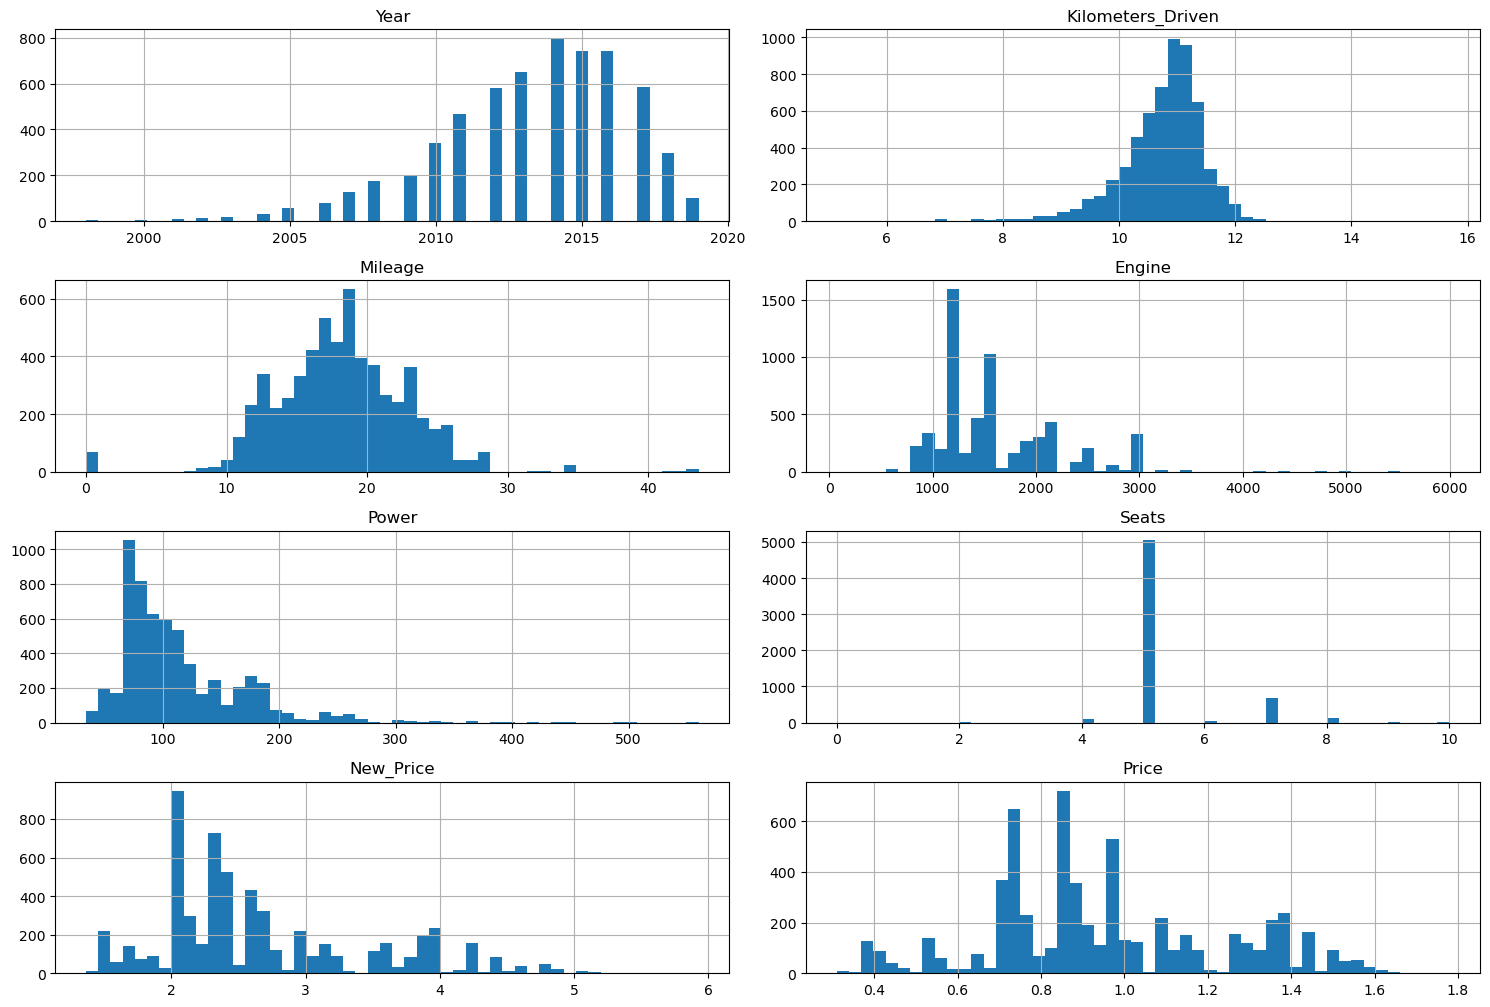

In [45]:
# visualise features after logarithmic transformation
columns_vis = list(num_df)
df1[columns_vis].hist(stacked = False, bins= 50, figsize = (15, 30), layout = (12, 2))
plt.tight_layout();

<Axes: xlabel='New_Price', ylabel='Price'>

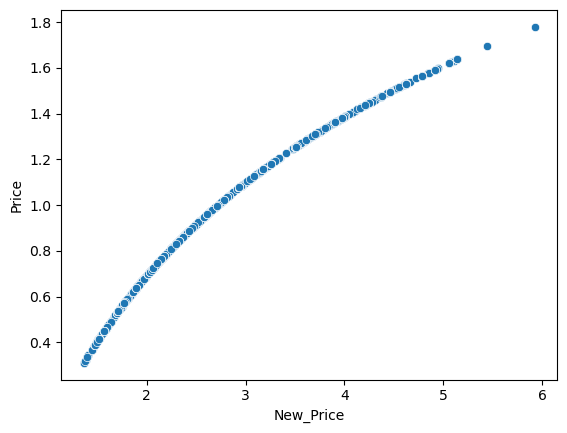

In [50]:
# plotting New Price against the target 
sns.scatterplot(data= df1, x= "New_Price", y= "Price")

<Axes: xlabel='Engine', ylabel='Price'>

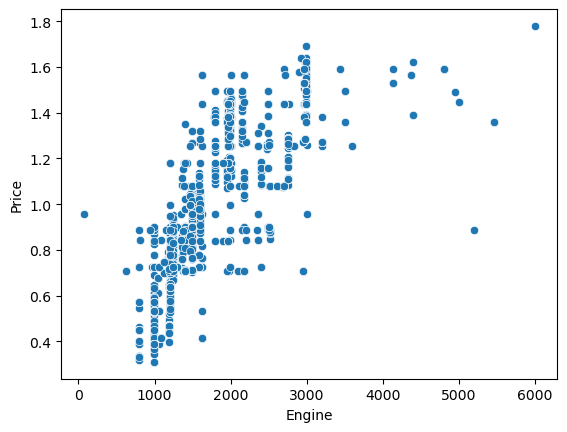

In [51]:
# ploting Engine against the Price 
sns.scatterplot(data= df1, x= "Engine", y= "Price");

<Axes: xlabel='Power', ylabel='Price'>

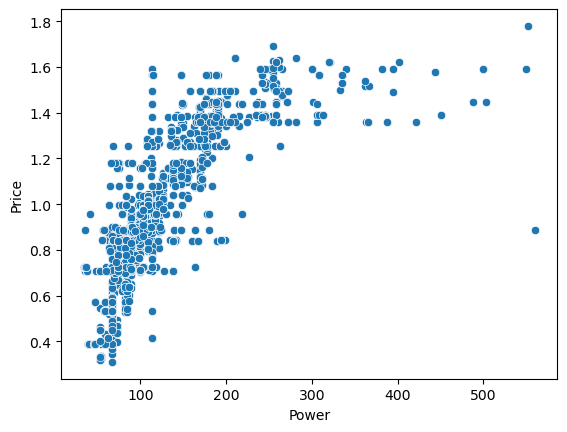

In [52]:
# plotting Power against Price 
sns.scatterplot(data= df1, x= "Power", y= "Price");

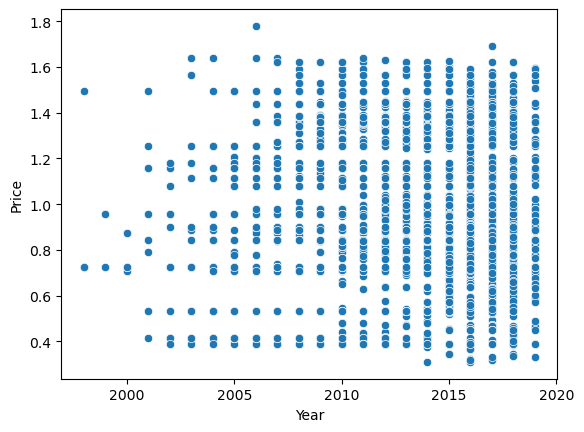

In [53]:
# plotting Year of manufacture against Price 
sns.scatterplot(data= df1, x= "Year", y= "Price");

## **Selecting input Features to build the Linear Regression Model** 

In [77]:
# selecting the input and output features 
x = df1.drop(["Price","Name","Location" ], axis = 1)
y= df1["Price"]

In [78]:
# Display the input features  
x

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,2010,11.184421,CNG,Manual,First,34.545455,998.0,58.16,5,1.706583
1,2015,10.621327,Diesel,Manual,First,19.670000,1582.0,126.20,5,2.776338
2,2011,10.736397,Petrol,Manual,First,18.200000,1199.0,88.70,5,2.152936
3,2012,11.373663,Diesel,Manual,First,20.770000,1248.0,88.76,7,2.422153
4,2013,10.613246,Diesel,Automatic,Second,15.200000,1968.0,140.80,5,3.972932
...,...,...,...,...,...,...,...,...,...,...
6014,2014,10.217020,Diesel,Manual,First,28.400000,1248.0,74.00,5,2.064341
6015,2015,11.512925,Diesel,Manual,First,24.400000,1120.0,71.00,5,2.107798
6016,2012,10.915088,Diesel,Manual,Second,14.000000,2498.0,112.00,8,2.457030
6017,2013,10.736397,Petrol,Manual,First,18.900000,998.0,67.10,5,1.706583


## **Performing One Hot Encoding of the Categorical Features** 

In [79]:
# transforming the categorical data in the input features 
x= pd.get_dummies(x, drop_first= True)

In [80]:
# Display x values after one hot encoding 
x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,11.184421,34.545455,998.0,58.16,5,1.706583,False,False,False,False,True,False,False,False
1,2015,10.621327,19.670000,1582.0,126.20,5,2.776338,True,False,False,False,True,False,False,False
2,2011,10.736397,18.200000,1199.0,88.70,5,2.152936,False,False,False,True,True,False,False,False
3,2012,11.373663,20.770000,1248.0,88.76,7,2.422153,True,False,False,False,True,False,False,False
4,2013,10.613246,15.200000,1968.0,140.80,5,3.972932,True,False,False,False,False,False,True,False


## **Split the Dataset**

In [81]:
# importing the train_test_split function to split the data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 27)

In [82]:
print(f"Traing Dataset: {x_train.shape}")
print(f"Testing Dataset: {x_test.shape}")

Traing Dataset: (4815, 15)
Testing Dataset: (1204, 15)


## **Normalizing the Dataset** 

In [83]:
# importing a scaler for normalizing the data 
from sklearn.preprocessing import MinMaxScaler

# creating an instance of the scaler 

scale = MinMaxScaler()


# fitting the scale to the data

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)


## **Building the Linear Regression Model** 

In [84]:
# importing the linear regression module
from sklearn.linear_model import LinearRegression

# creating an instance of the linear regression model

linear_regr = LinearRegression()

# training the model 

linear_regr.fit(x_train_scaled, y_train)

LinearRegression()

## **Making Predictions** 

In [85]:
x_pred= linear_regr.predict(x_train_scaled)
y_pred= linear_regr.predict(x_test_scaled)

## **Evaluating the Model** 

In [86]:
# importing the evaluation metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
# creating a function to calcualte the evaluation metrics 
def metrics(model, predictors, targets): 
    mae = mean_absolute_error(predictors, targets)
    mse = mean_squared_error(predictors, targets)
    rmse = np.sqrt(mean_squared_error(predictors, targets))
    r2 = r2_score(predictors, targets)
    metrics_df = pd.DataFrame({"MAE": [mae], "MSE": [mse],"RMSE":[rmse], "R2": [r2]})
    return metrics_df

## **Evaluting the Training Data** 

In [87]:
metrics(linear_regr,  y_train, x_pred,)

,MAE,MSE,RMSE,R2
0,0.029412,0.001689,0.041093,0.978453


## **Evaluting the Testing Data** 

In [88]:
metrics(linear_regr, y_test, y_pred)

,MAE,MSE,RMSE,R2
0,0.030261,0.001855,0.043065,0.977342


## **Performing Feature Selection to find out feature(s) performance** 

In [89]:
# importing the mlxtend funciton
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [90]:
linear_regr = LinearRegression()

# Build step forward selection

sfs = SFS(linear_regr, k_features= x_train_scaled.shape[1], forward=True, scoring= "r2", n_jobs= -1, verbose = 2)

# perform SFS
sfs.fit(x_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.6s finished

[2024-02-02 23:12:32] Features: 1/15 -- score: 0.9746127512182424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2024-02-02 23:12:32] Features: 2/15 -- score: 0.9760447097215892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2024-02-02 23:12:32] Features: 3/15 -- score: 0.976637643498375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(15, 15),
                          n_jobs=-1, scoring='r2', verbose=2)

* The model performance tends to be same after the 10th feature

In [91]:
# plotting the feature performance 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs.get_metric_dict()

{1: {'feature_idx': (6,),
  'cv_scores': array([0.97520912, 0.97411051, 0.97420077, 0.97645944, 0.97308391]),
  'avg_score': 0.9746127512182424,
  'feature_names': ('6',),
  'ci_bound': 0.0014683013959132945,
  'std_dev': 0.0011423883690448349,
  'std_err': 0.0005711941845224175},
 2: {'feature_idx': (6, 11),
  'cv_scores': array([0.97697866, 0.97572994, 0.97545464, 0.97768157, 0.97437874]),
  'avg_score': 0.9760447097215892,
  'feature_names': ('6', '11'),
  'ci_bound': 0.0014960590595694489,
  'std_dev': 0.0011639847743883888,
  'std_err': 0.0005819923871941944},
 3: {'feature_idx': (5, 6, 11),
  'cv_scores': array([0.97762155, 0.97645046, 0.97564966, 0.97832763, 0.97513892]),
  'avg_score': 0.976637643498375,
  'feature_names': ('5', '6', '11'),
  'ci_bound': 0.0015296004982627252,
  'std_dev': 0.0011900811532046711,
  'std_err': 0.0005950405766023356},
 4: {'feature_idx': (4, 5, 6, 11),
  'cv_scores': array([0.97817898, 0.97674794, 0.97620768, 0.97854317, 0.97630402]),
  'avg_score

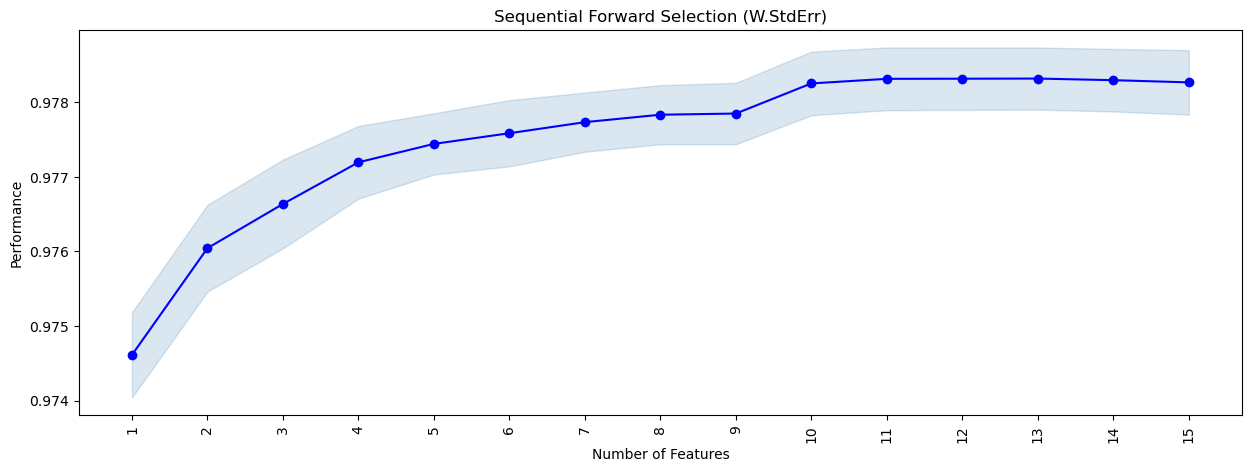

In [92]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind= "std_err", figsize = (15, 5))
plt.title("Sequential Forward Selection (W.StdErr)")
plt.xticks(rotation = 90)
plt.show()

In [93]:
# building the model with 10 features 
linear_model = LinearRegression()

# Build step forward selection
sfs = SFS(linear_model, k_features=10, forward= True, scoring= "r2", n_jobs= -1, verbose = 2)

# perform SFS
sfs.fit(x_train_scaled, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2024-02-02 23:17:20] Features: 1/10 -- score: 0.9746127512182424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2024-02-02 23:17:20] Features: 2/10 -- score: 0.9760447097215892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2024-02-02 23:17:20] Features: 3/10 -- score: 0.976637643498375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(10, 10),
                          n_jobs=-1, scoring='r2', verbose=2)

In [94]:
# select features to build the model
feature_col= list(sfs.k_feature_idx_)
print(feature_col)

[0, 1, 3, 4, 5, 6, 7, 9, 10, 11]


In [95]:
# names of the important features
x_train.columns[feature_col]

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [96]:
X_train = x_train[x_train.columns[feature_col]]
X_test = x_test[x_test.columns[feature_col]]

In [97]:
# creating an instance of the scaler 

scale = MinMaxScaler()


# fitting the scale to the data

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


In [98]:
# Re-build the Linear Regression Model 

linear_regr2 = LinearRegression()
linear_regr2.fit(X_train_scaled, y_train)

LinearRegression()

In [102]:
# making predictions 
x_pred= linear_regr2.predict(X_train_scaled)
y_pred= linear_regr2.predict(X_test_scaled)

In [103]:
# perfomance of the training set 
metrics(linear_regr2,  y_train, x_pred,)

,MAE,MSE,RMSE,R2
0,0.02947,0.001695,0.041164,0.978378


In [104]:
# performance of the testing set 
metrics(linear_regr2, y_test, y_pred)

,MAE,MSE,RMSE,R2
0,0.030294,0.001856,0.043087,0.977319


# **Recomendation**

 
* In determing the price of second hand car, the following features shoud be taken into consideration; ie price of New car of the same model, the year of manufacture, the fuel type, the maximum power of the engine, the engine capacity and the transmission 